In [ ]:
import menpo.io as mio
from menpo.visualize import print_progress
from menpo.landmark import labeller, face_ibug_68_to_face_ibug_68_trimesh
from menpofit.aam import HolisticAAM
from menpo.feature import fast_dsift
from menpofit.aam import LucasKanadeAAMFitter, WibergInverseCompositional
import numpy as np
import menpo

path_to_images = '/home/rshaydu/tensorfaces/helen/trainset/'
training_images = []
for img in print_progress(mio.import_images(path_to_images, verbose=True)):
    # convert to greyscale
    if img.n_channels == 3:
        img = img.as_greyscale()
    # crop to landmarks bounding box with an extra 20% padding
    img = img.crop_to_landmarks_proportion(0.2)
    # rescale image if its diagonal is bigger than 400 pixels
    d = img.diagonal()
    if d > 400:
        img = img.rescale(400.0 / d)
    # define a TriMesh which will be useful for Piecewise Affine Warp of HolisticAAM
    labeller(img, 'PTS', face_ibug_68_to_face_ibug_68_trimesh)
    # append to list
    training_images.append(img)

aam = HolisticAAM(training_images, group='face_ibug_68_trimesh', diagonal=150,
                  scales=(0.5, 1.0), holistic_features=fast_dsift, verbose=True,
                  max_shape_components=20, max_appearance_components=150)


fitter = LucasKanadeAAMFitter(aam, lk_algorithm_cls=WibergInverseCompositional,
                              n_shape=[5, 20], n_appearance=[30, 150])

In [18]:
import menpo.io as mio
import os
from menpo.visualize import print_progress
from menpo.landmark import labeller, face_ibug_68_to_face_ibug_68_trimesh

image_folder = '/home/rshaydu/tensorfaces/Facebase-landmark-points-fixed-curr-batch/'
cootes_images = []
img_files = list(filter(lambda x: ".png" in x, os.listdir(image_folder)))
# for img in print_progress(mio.import_images(image_folder, verbose=True)):
for img_file in img_files:
    img_path = image_folder+img_file
    img = mio.import_image(img_path)
    # convert to greyscale
    if img.n_channels == 3:
        img = img.as_greyscale()
    # crop to landmarks bounding box with an extra 20% padding
    img = img.crop_to_landmarks_proportion(0.2)
    # rescale image if its diagonal is bigger than 400 pixels
    d = img.diagonal()
    if d > 400:
        img = img.rescale(400.0 / d)
    # define a TriMesh which will be useful for Piecewise Affine Warp of HolisticAAM
    labeller(img, 'PTS', face_ibug_68_to_face_ibug_68_trimesh)
    # append to list
    result = fitter.fit_from_shape(img, img.landmarks['face_ibug_68_trimesh'], max_iters=1)
    warped = fitter.warped_images(result.image, [result.final_shape, fitter.reference_shape])
    outpath = "/home/rshaydu/tensorfaces/FaceBase_warped_after_adjusting_points/"+img_file
    mio.export_image(warped[0],outpath) #,overwrite=True)
    print("Exported warped image to ", outpath)

Exported warped image to  /home/rshaydu/tensorfaces/FaceBase_warped_after_adjusting_points/bruno-vp3-il0-ex2.png
Exported warped image to  /home/rshaydu/tensorfaces/FaceBase_warped_after_adjusting_points/bruno-vp3-il1-ex2.png
Exported warped image to  /home/rshaydu/tensorfaces/FaceBase_warped_after_adjusting_points/bruno-vp3-il2-ex2.png
Exported warped image to  /home/rshaydu/tensorfaces/FaceBase_warped_after_adjusting_points/dani-vp3-il0-ex2.png
Exported warped image to  /home/rshaydu/tensorfaces/FaceBase_warped_after_adjusting_points/dani-vp3-il1-ex2.png
Exported warped image to  /home/rshaydu/tensorfaces/FaceBase_warped_after_adjusting_points/dani-vp3-il2-ex2.png
Exported warped image to  /home/rshaydu/tensorfaces/FaceBase_warped_after_adjusting_points/david-vp3-il0-ex2.png
Exported warped image to  /home/rshaydu/tensorfaces/FaceBase_warped_after_adjusting_points/david-vp3-il1-ex2.png
Exported warped image to  /home/rshaydu/tensorfaces/FaceBase_warped_after_adjusting_points/david-vp

Exported warped image to  /home/rshaydu/tensorfaces/FaceBase_warped_after_adjusting_points/amir-vp3-il2-ex2.png
Exported warped image to  /home/rshaydu/tensorfaces/FaceBase_warped_after_adjusting_points/amit-vp3-il0-ex2.png
Exported warped image to  /home/rshaydu/tensorfaces/FaceBase_warped_after_adjusting_points/amit-vp3-il1-ex2.png
Exported warped image to  /home/rshaydu/tensorfaces/FaceBase_warped_after_adjusting_points/amit-vp3-il2-ex2.png
Exported warped image to  /home/rshaydu/tensorfaces/FaceBase_warped_after_adjusting_points/avidan-vp3-il0-ex2.png
Exported warped image to  /home/rshaydu/tensorfaces/FaceBase_warped_after_adjusting_points/avidan-vp3-il1-ex2.png
Exported warped image to  /home/rshaydu/tensorfaces/FaceBase_warped_after_adjusting_points/avidan-vp3-il2-ex2.png
Exported warped image to  /home/rshaydu/tensorfaces/FaceBase_warped_after_adjusting_points/avishai-vp3-il0-ex2.png
Exported warped image to  /home/rshaydu/tensorfaces/FaceBase_warped_after_adjusting_points/avis

In [9]:
img = mio.import_image('/home/rshaydu/tensorfaces/Facebase-landmark-points-fixed-curr-batch/moshe1-vp1-il1-ex2.png')
# convert to greyscale
if img.n_channels == 3:
    img = img.as_greyscale()
# crop to landmarks bounding box with an extra 20% padding
img = img.crop_to_landmarks_proportion(0.2)
# rescale image if its diagonal is bigger than 400 pixels
d = img.diagonal()
if d > 400:
    img = img.rescale(400.0 / d)
# define a TriMesh which will be useful for Piecewise Affine Warp of HolisticAAM
labeller(img, 'PTS', face_ibug_68_to_face_ibug_68_trimesh)
# append to list
result = fitter.fit_from_shape(img, img.landmarks['face_ibug_68_trimesh'], max_iters=1)

result.view(render_initial_shape=True)

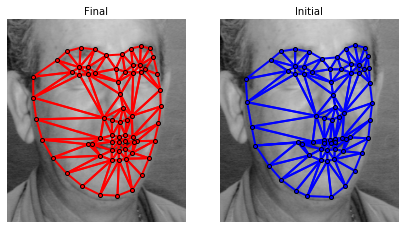

In [11]:
result.view(render_initial_shape=True)

In [27]:
result = fitter.fit_from_shape(cootes_images[0], cootes_images[0].landmarks['face_ibug_68_trimesh'], max_iters=1)

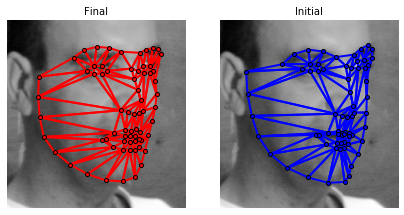

In [28]:
result.view(render_initial_shape=True)

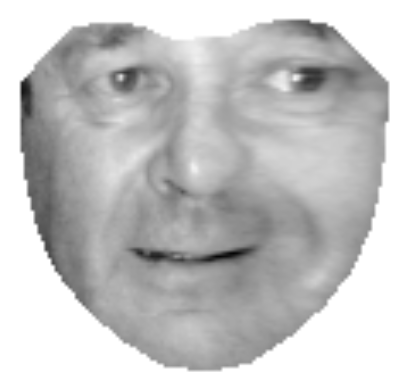

In [12]:
warped = fitter.warped_images(result.image, [result.final_shape, fitter.reference_shape])
warped[0].view()

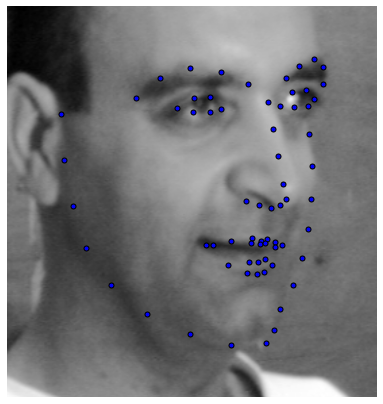

In [4]:
cootes_images[0].view_landmarks(group='PTS')

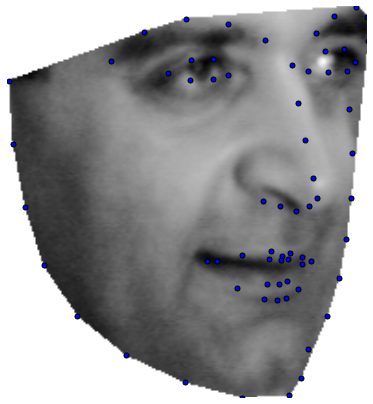

In [14]:
mask = cootes_images[0].as_masked()
mask = mask.crop_to_landmarks(group='PTS')
mask = mask.constrain_mask_to_landmarks(group='PTS')
mask.view_landmarks(group='PTS')

In [24]:
from menpo.transform import ThinPlateSplines, PiecewiseAffine
transform_to_ref = ThinPlateSplines(fitter.reference_shape, cootes_images[0].landmarks['PTS'])
warped = cootes_images[0].warp_to_shape(fitter.reference_shape, transform_to_ref)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'TriMesh'

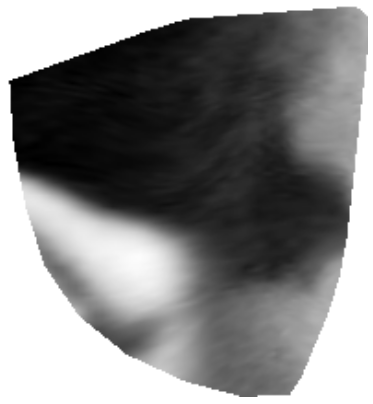

In [22]:
warped.view()

In [25]:
# cootes_images[0].warp_to_shape(cootes_images[0].landmarks['PTS'], menpo.transform.ThinPlateSplines)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'PointCloud'

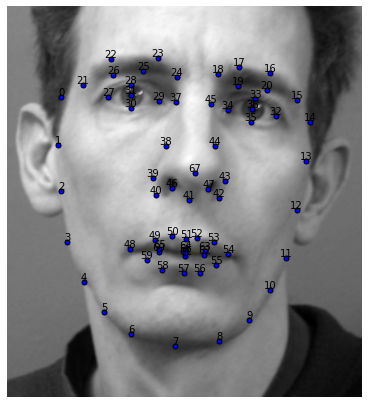

In [16]:
cootes_images[0].view_landmarks(group='PTS', render_numbering=True)